# 2D Spectra

## Setup

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

## [Dowload data](https://www.dropbox.com/sh/10zzp0fsjdijwg7/AADSAOUxQvyc_8EZlnzMzdXSa?dl=1)

Unzip this into a folder named `data` in the same level as this notebook

## Plot

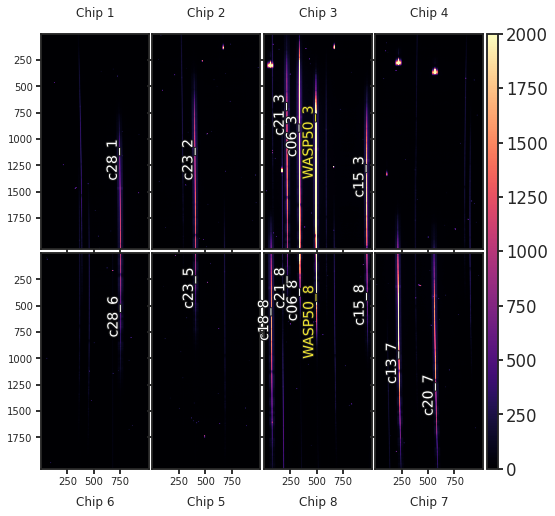

In [7]:
data_dir = "../data/raw/IMACS"
data_dict = {
    "Transit_1": {
        "path": f"{data_dir}/ut131219",
#         "ift": "0024", # field
        "ift": "0026", # sci
        "sky_ap": 25,
    },
#     "transit_2": {
#         "path": f"{data_dir}/ut170609",
#         "ift": "0183",
#         "sky_ap": 25,
#     },
#     "transit_3": {
#         "path": f"{data_dir}/ut180603",
#         "ift": "0076",
#         "sky_ap": 25,
#     },
}

for transit, transit_info in data_dict.items():
    dirpath = transit_info["path"]
    fname = f"ift{transit_info['ift']}"
    sky_ap = transit_info["sky_ap"]
    fig, im = utils.plot_chips(
        dirpath,
        fname,
        target="WASP50",
        vmin=0,
        vmax=2_000,
        sky_ap=100,
        spec_ap=10,
    )

    # Save
    title = f"raw_frame_{transit}"
    #utils.savefig(f"../paper/figures/raw_frames/{title}.pdf")

In [11]:
data_dict["Transit_1"]

{'path': '../data/raw/IMACS/ut131219', 'ift': '0026', 'sky_ap': 25}

In [25]:
with open(f"../data/raw/IMACS/ut131219/ift0026c8.fits", "rb") as f:
        hdu = fits.open(f)
        d = hdu[0].data

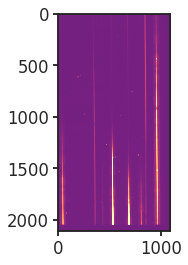

In [40]:
plt.imshow(d, vmin=0, vmax=2_000, cmap="magma")

## LDSS3

In [ ]:
def plot_chips_LDSS3(dirpath, fnumber):
    with open(f"{dirpath}/{fnumber}c1.fits", "rb") as f:
        data_left = fits.open(f)[0].data
    with open(f"{dirpath}/{fnumber}c2.fits", "rb") as f:
        data_right = fits.open(f)[0].data

    fig, axes = plt.subplots(1, 2, sharey=True)
    ax_left, ax_right = axes

    ax_left.imshow(data_left, vmin=0, vmax=2_000)
    ax_right.imshow(data_right, vmin=0, vmax=2_000)

    fig.tight_layout()
    
    fig.suptitle(fnumber)

In [ ]:
plot_chips_LDSS3("/home/mango/data/WASP50/ut150927_LDSS3", "ccd0602") # field

In [ ]:
plot_chips_LDSS3("/home/mango/data/WASP50/ut150927_LDSS3", "ccd0603") # thru mask

In [ ]:
plot_chips_LDSS3("/home/mango/data/WASP50/ut150927_LDSS3", "ccd0606") # sci